# Manifold Learning

## Metric Multidimensional Scaling (MDS)
- Find the latent Euclidean coordinates to match a given distance matrix
- Formally, what are the $\{x_k\}$ vectors in $\mathbb{R}^d$ s.t. $ d_{ij} = \lvert\!\lvert x_i - x_j \rvert\!\rvert \ \ \ $ for all $i$ and $j$

## Isomap
- Isometric feature mapping
- Use geodesic distance on the neighborhood graph
- Run MDS on that embedding with Euclidean distances approximating the geodesics

### Algorithm
- Neigborhood graph 
- Find $\{x_k\}$ objects within $\epsilon$ distance or $k$ nearest neighbors of all points, $\epsilon$-Isomap or $k$-Isomap 
- Assign $d_G(i,j)=d_X(i,j)$ distances to edges between neighbors and initialize other elements to $\infty$
- Find shortest paths, e.g., by repeating $ \displaystyle d_G(i,j) = \min_k \Big\{ d_G(i,j),\ \big[d_G(i,k)\!+\!d_G(k,j)\big] \Big\}$
- Low-dimensional embedding to approximate the $d_G(i,j)$ for all $i$ and $j$

## Locally-Linear Embedding (LLE)
- Linear combination of neighbors
- Based on the weights only
- Create lower-dimensional coordinates with similar linear combinations


<!--
<img src="https://www.cs.nyu.edu/~roweis/lle/images/llef2med.gif" align=center width=350>
-->

<img src="files/llef2med.gif" align=center width=350>


## sklearn manifold

- Documentation at http://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold

- Details at http://scikit-learn.org/stable/modules/manifold.html#manifold

- See also at http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

## Example


In [1]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011


from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.manifold import MDS 
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding 

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

X.shape, y.shape

((1083, 64), (1083,))

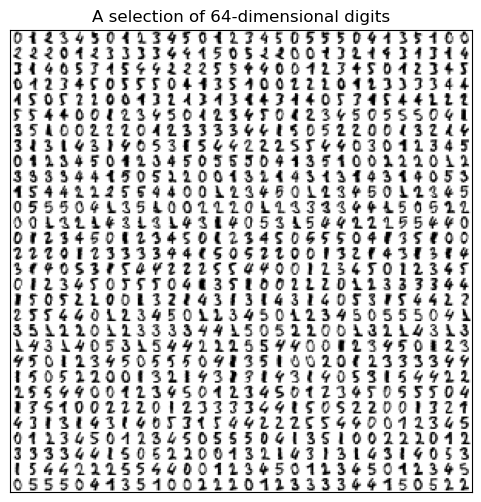

In [2]:
# Plot images of the digits

n_img_per_row = 30
img = 0 * np.ones((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix: ix + 8, iy: iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection of 64-dimensional digits');

In [3]:
# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / np.unique(digits.target).size),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing random projection
Computing PCA projection
Computing MDS embedding
Computing Isomap embedding
Computing LLE embedding
Computing Spectral embedding
Computing t-SNE embedding


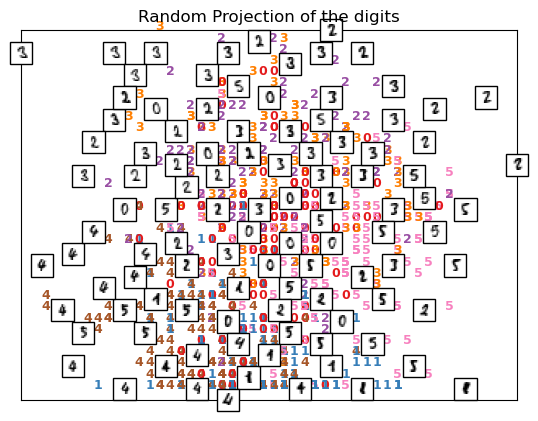

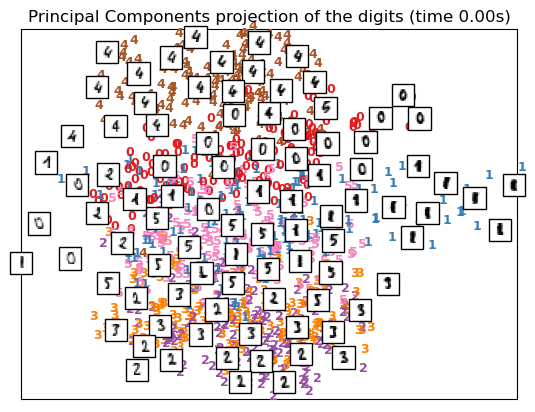

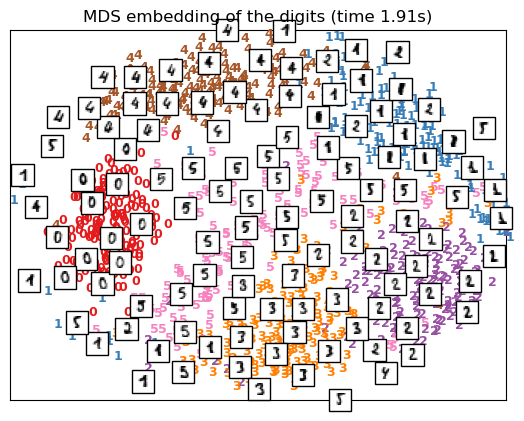

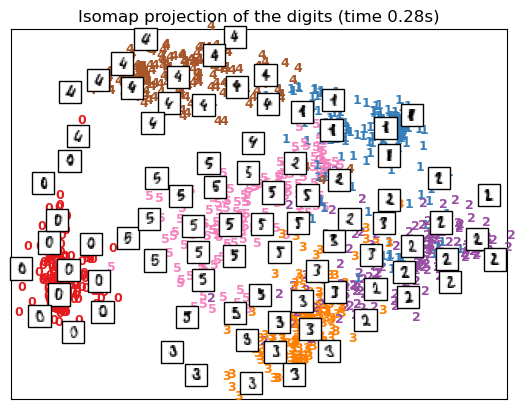

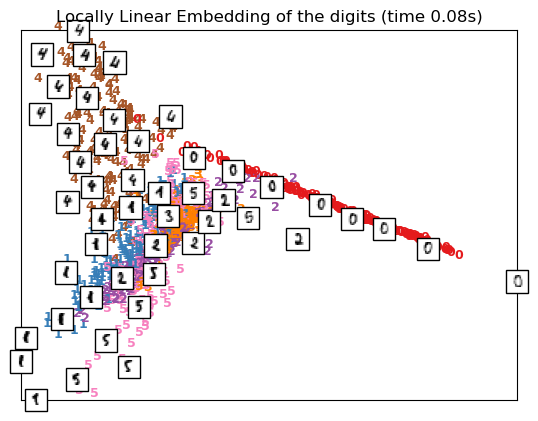

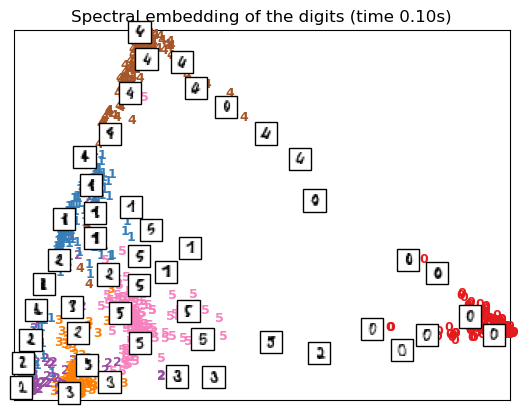

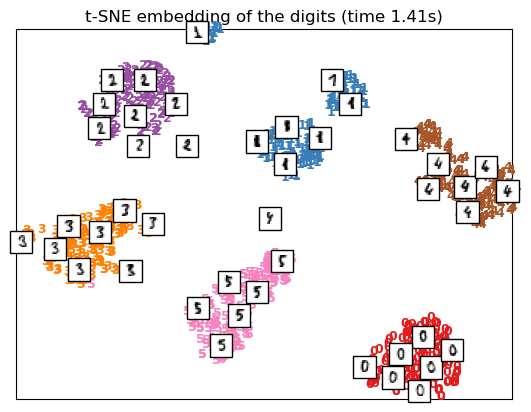

In [6]:
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, "Principal Components projection of the digits (time %.2fs)" % (time()-t0))

print("Computing MDS embedding")
clf = manifold.MDS(metric=True, n_components=2, n_init=1, max_iter=100, normalized_stress=False)
t0 = time()
X_mds = clf.fit_transform(X)
plot_embedding(X_mds, "MDS embedding of the digits (time %.2fs)" % (time()-t0))


print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, "Isomap projection of the digits (time %.2fs)" % (time()-t0))


print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
plot_embedding(X_lle, "Locally Linear Embedding of the digits (time %.2fs)" % (time()-t0))


print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)
plot_embedding(X_se, "Spectral embedding of the digits (time %.2fs)" % (time()-t0))


print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, learning_rate='auto')
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time()-t0))